In [7]:
require(ISLR2)

# Default Dataset

[1] "default" "student" "balance" "income"

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

The following objects are masked from Default (pos = 3):

    balance, default, income, student




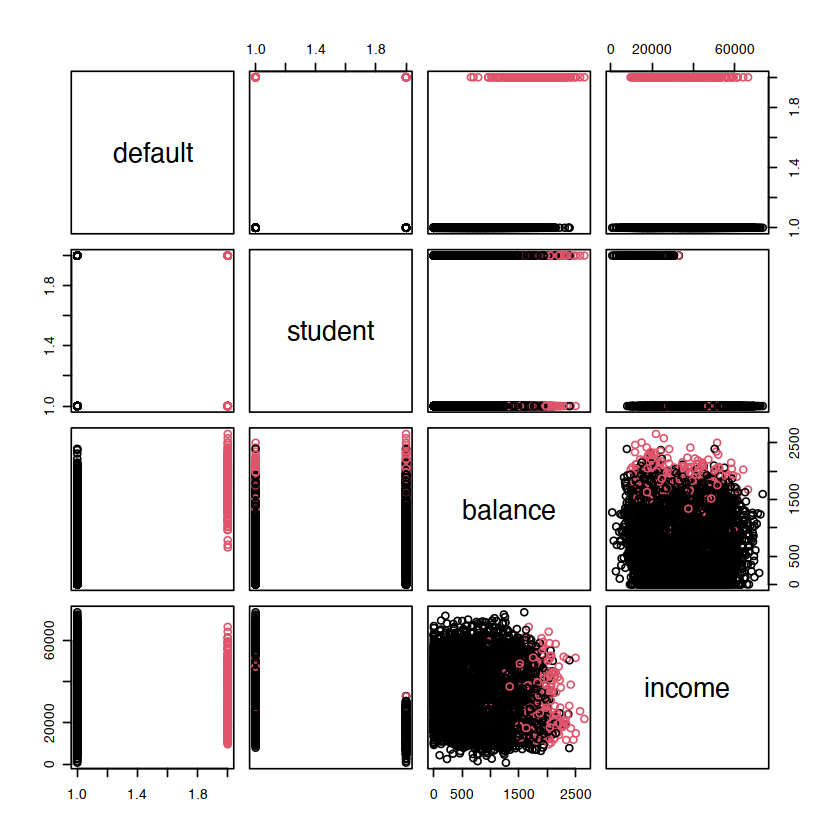

In [9]:
names(Default)
head(Default)
summary(Default)
attach(Default)
pairs(Default, col=default)

## Logistic Regression

In [10]:
glm.fit=glm(default~balance, data=Default, family=binomial)
summary(glm.fit)


Call:
glm(formula = default ~ balance, family = binomial, data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [11]:
glm.probs=predict(glm.fit, type="response") 
glm.probs[1:5]

1            2            3            4            5 
0.0013056797 0.0021125949 0.0085947405 0.0004344368 0.0017769574

In [12]:
glm.pred=ifelse(glm.probs>0.5, "Yes", "No")
table(glm.pred, default)
mean(glm.pred==default)

        default
glm.pred   No  Yes
     No  9625  233
     Yes   42  100

[1] 0.9725

## Split into training and testing

In [14]:
set.seed(2023)
n=nrow(Default)
train.index=sample(1:n, n*0.75)
train=Default[train.index,]
test=Default[-train.index,]

## Logistic Regression 2

In [15]:
glm.fit=glm(default~balance, data=train, family=binomial)
summary(glm.fit)
glm.probs=predict(glm.fit, newdata=test, type="response") 
glm.pred=ifelse(glm.probs>0.5, "Yes", "No")
table(glm.pred, test$default)
mean(glm.pred==default)


Call:
glm(formula = default ~ balance, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2354  -0.1546  -0.0634  -0.0244   3.7155  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.040e+01  4.022e-01  -25.87   <2e-16 ***
balance      5.366e-03  2.473e-04   21.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2205.6  on 7499  degrees of freedom
Residual deviance: 1239.8  on 7498  degrees of freedom
AIC: 1243.8

Number of Fisher Scoring iterations: 8


        
glm.pred   No  Yes
     No  2406   55
     Yes   13   26

[1] 0.9529

In [16]:
personx = list("balance"=2000) 
personxp = predict(glm.fit, personx, type="response") 
personxs = ifelse(personxp>0.5, "Yes", "No")
personxs


1 
"Yes"

# Smarket dataset

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

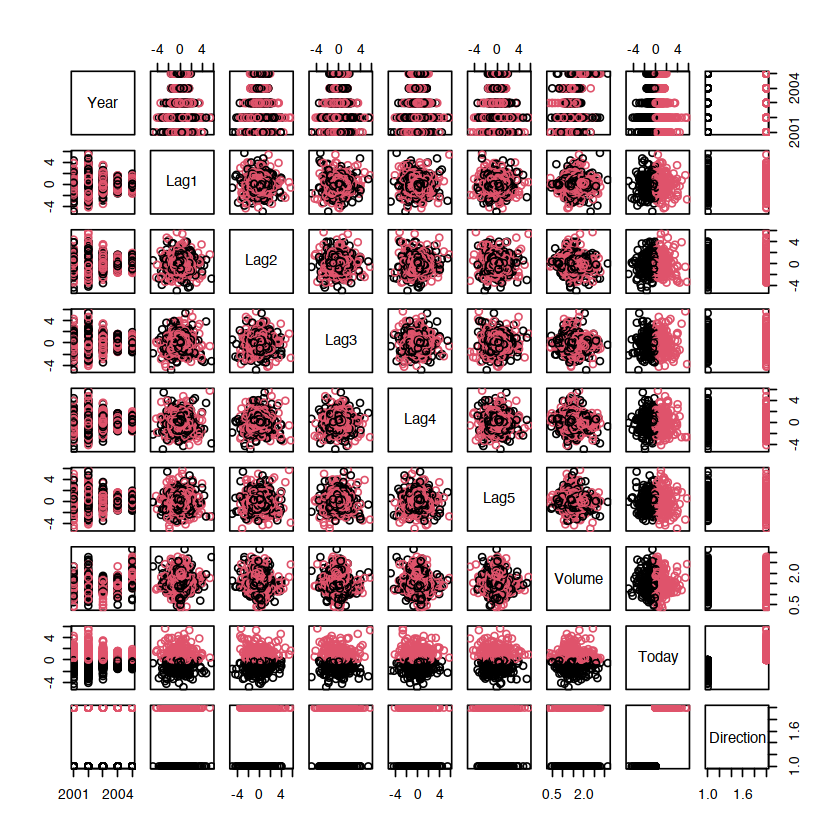

In [17]:
names(Smarket)
summary(Smarket)
pairs(Smarket,col=Smarket$Direction)


## Logistic Regression

In [18]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Smarket,family=binomial)
summary(glm.fit)
glm.probs=predict(glm.fit,type="response") 
glm.probs[1:5]
glm.pred=ifelse(glm.probs>0.5,"Up","Down")
attach(Smarket)
table(glm.pred,Direction)
mean(glm.pred==Direction)



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

[1] 0.5216

## Training and Testing

In [19]:
train = Year<2005
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Smarket,family=binomial, subset=train)
glm.probs=predict(glm.fit,newdata=Smarket[!train,],type="response") 
glm.pred=ifelse(glm.probs >0.5,"Up","Down")
Direction.2005=Smarket$Direction[!train]
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)


        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

[1] 0.4801587

## Smaller Model

In [20]:
glm.fit=glm(Direction~Lag1+Lag2,
            data=Smarket,family=binomial, subset=train)
glm.probs=predict(glm.fit,newdata=Smarket[!train,],type="response") 
glm.pred=ifelse(glm.probs >0.5,"Up","Down")
table(glm.pred,Direction.2005)
mean(glm.pred==Direction.2005)


        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

## Training Errors

In [22]:
Direction.prior = Smarket$Direction[train]

glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Smarket,family=binomial, subset=train)
glm.probs=predict(glm.fit,newdata=Smarket[train,],type="response") 
glm.pred=ifelse(glm.probs >0.5,"Up","Down")
table(glm.pred,Direction.prior)
mean(glm.pred==Direction.prior)

        Direction.prior
glm.pred Down  Up
    Down  175 156
    Up    316 351

[1] 0.5270541

In [23]:
glm.fit=glm(Direction~Lag1+Lag2,
            data=Smarket,family=binomial, subset=train)
glm.probs=predict(glm.fit,newdata=Smarket[train,],type="response") 
glm.pred=ifelse(glm.probs >0.5,"Up","Down")
table(glm.pred,Direction.prior)
mean(glm.pred==Direction.prior)

        Direction.prior
glm.pred Down  Up
    Down  168 160
    Up    323 347

[1] 0.5160321

# LDA

In [24]:
require(MASS)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston




Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

[1] "class"     "posterior" "x"

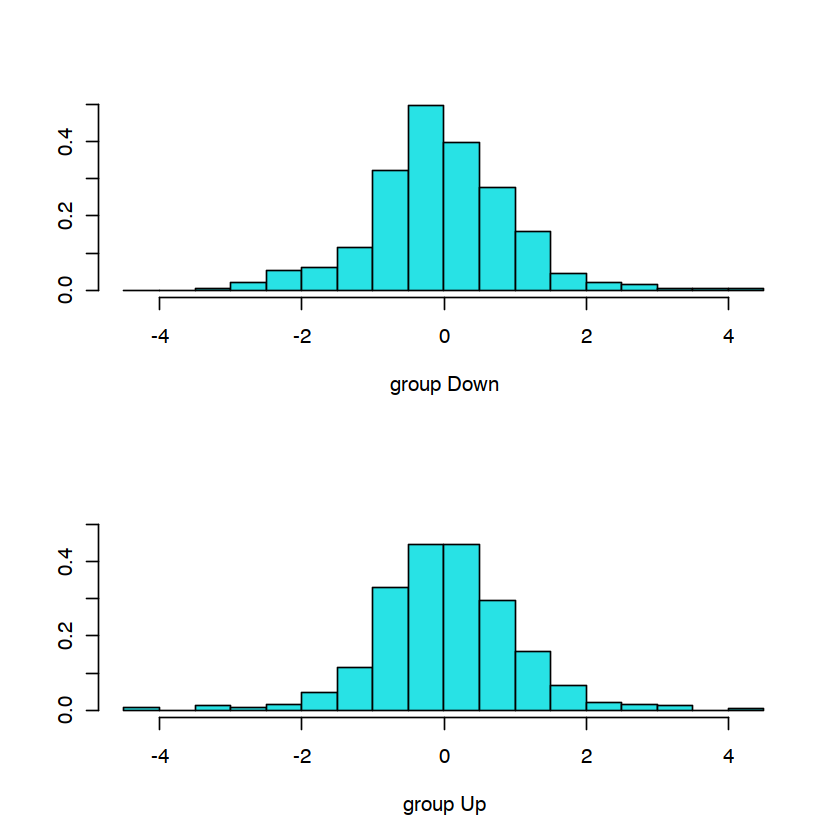

In [25]:
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket, subset=Year<2005)
lda.fit
plot(lda.fit)
Smarket.2005=subset(Smarket,Year==2005)
lda.pred=predict(lda.fit,Smarket.2005)
names(lda.pred)


In [26]:
class(lda.pred)
data.frame(lda.pred)[1:10,]
cbind(lda.pred$class[1:10],lda.pred$posterior[1:10,], lda.pred$x[1:10])
table(lda.pred$class,Smarket.2005$Direction)
mean(lda.pred$class==Smarket.2005$Direction)

[1] "list"

,class,posterior.Down,posterior.Up,LD1
,<fct>,<dbl>,<dbl>,<dbl>
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.59114102
1001,Up,0.4668185,0.5331815,1.16723063
1002,Up,0.4740011,0.5259989,0.83335022
1003,Up,0.4927877,0.5072123,-0.03792892
1004,Up,0.4938562,0.5061438,-0.08743142
1005,Up,0.4951016,0.5048984,-0.14512719
1006,Up,0.4872861,0.5127139,0.21701324
1007,Up,0.4907013,0.5092987,0.05873792


,,Down,Up,
999,2,0.4901792,0.5098208,0.08293096
1000,2,0.4792185,0.5207815,0.59114102
1001,2,0.4668185,0.5331815,1.16723063
1002,2,0.4740011,0.5259989,0.83335022
1003,2,0.4927877,0.5072123,-0.03792892
1004,2,0.4938562,0.5061438,-0.08743142
1005,2,0.4951016,0.5048984,-0.14512719
1006,2,0.4872861,0.5127139,0.21701324
1007,2,0.4907013,0.5092987,0.05873792
1008,2,0.4844026,0.5155974,0.35068642


      
       Down  Up
  Down   35  35
  Up     76 106

[1] 0.5595238

# KNN

In [27]:
library(class)

In [28]:
attach(Smarket)
Xlag=cbind(Lag1,Lag2)
train=Year<2005
knn.pred=knn(Xlag[train,],Xlag[!train,],Direction[train],k=1)
table(knn.pred,Direction[!train])
mean(knn.pred==Direction[!train])

The following objects are masked from Smarket (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




        
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

In [29]:
knn.pred=knn(Xlag[train,],Xlag[!train,],Direction[train],k=5)
table(knn.pred,Direction[!train])
mean(knn.pred==Direction[!train])

        
knn.pred Down Up
    Down   40 59
    Up     71 82

[1] 0.484127

In [30]:
knn.pred=knn(Xlag[train,],Xlag[!train,],Direction[train],k=9)
table(knn.pred,Direction[!train])
mean(knn.pred==Direction[!train])

        
knn.pred Down Up
    Down   45 61
    Up     66 80

[1] 0.4960317